In [6]:
import numpy as np
import queue
from statistics import mean
import matplotlib.pyplot as plt
import math
import random

In [19]:
def avl_server(t,servers):
    low = len(servers)
    i = 0
    for s in servers:
        if t > s[1]:
            if low == len(servers):
                low = i
            elif s[1] < servers[low][1]:
                low = i
        i += 1
    if low < len(servers):
        return low #return server with earliest idle time
    return len(servers)

def get_avl_servers(t,servers,n):
    empty = []
    i = 0
    for s in servers:
        if t >= s[1]: #get empty servers
            empty.append((i,s[1]))
        i += 1
    empty.sort(key = lambda x: x[1])
    return empty[:n] #return the [server index,free time]

def busy_server_n(t,servers):
    n = 0
    i = 0
    for s in servers:
        if t >= s[1] or t < s[0]: #get empty servers
            n += 1
            #print(i)
        i+=1
    return len(servers)-n #reverse

def get_job_size():
    size = random.randint(1,10)
    if size < 10:
        return 1
    return size

def get_srv_rate(job_size):
    if job_size == 1:
        return 5
    elif job_size == 10:
        return 1

In [22]:
arr_rate = 1
duration = 3600*10
#job_size = 10

server_n = 10
#srv_rate = 5

t = 0
jobs_arr_t = []
while t <= duration:
    iat = np.random.exponential(1/arr_rate)
    t += iat
    #jobs_arr_t.append((t,random.choice([1,job_size])))
    jobs_arr_t.append((t,get_job_size()))

jobs_arr_t

[(0.12628373003746843, 1),
 (1.5954103986984107, 1),
 (2.323155317740927, 1),
 (2.6450567528204036, 10),
 (3.0223386152683136, 1),
 (5.561166731151742, 10),
 (5.622044147504534, 1),
 (6.2339775321979465, 10),
 (8.34065057053051, 1),
 (8.681375397890175, 1),
 (8.767767855153478, 1),
 (8.865389448287281, 1),
 (9.24092604995473, 10),
 (9.471324676752578, 1),
 (10.532958838185795, 1),
 (10.879205401978108, 1),
 (11.369051504255678, 10),
 (14.69960816121202, 1),
 (15.176806849869953, 1),
 (16.216932386077264, 1),
 (16.58934528259617, 1),
 (16.717462799652413, 1),
 (17.652114746838528, 1),
 (18.048686581849307, 1),
 (18.081860119009566, 1),
 (18.221733089106024, 1),
 (20.496052013088246, 1),
 (22.763531845663067, 1),
 (23.075114883950306, 1),
 (23.458887941144194, 1),
 (23.816229099712928, 1),
 (27.49775368611921, 1),
 (29.191276949734444, 10),
 (33.3887372339845, 1),
 (36.74856784495039, 1),
 (36.97570877377087, 1),
 (37.1208030370369, 1),
 (37.62470342587043, 1),
 (38.70820816358229, 1),
 

In [84]:
utils = []
throughputs = []
max_lambda = 12

for arr_rate in range(1,max_lambda+1):
    tmp_thru = []
    duration = 3600*10
    #job_size = 10

    server_n = 10
    #srv_rate = 5

    # POPULATE THE JOBS ARRIVAL TIMES AND JOB SIZE
    t = 0
    jobs_arr_t = []
    while t <= duration:
        iat = np.random.exponential(1/arr_rate)
        t += iat
        #jobs_arr_t.append((t,random.choice([1,job_size])))
        jobs_arr_t.append((t,get_job_size()))

    comb_wt = []
    comb_rt = []
    comb_sl = []
    comb_qs = []

    waiting_times = []
    response_times = []
    queue = []

    # INITIATE THE N SERVERS
    servers = [] #[service_start,end]
    for s in range(server_n):
        servers.append([0,0])

    server_load = [[0,0]]
    queue_size = [[0,0]]
    throughput_1 = 0
    throughput_10 = 0

    job_id = 0
    # ITERATE EVENT-BASED (CAN BE JOBS ARRIVAL OR SERVICE FINISHED)
    while job_id < len(jobs_arr_t):
        t = 999999999
        curr_job = jobs_arr_t[job_id] 
        # ITERATE ALL THE SERVERS AND GET THE NEXT EARLIEST SERVER FINISH
        for s in servers:
            if s[1] > 0 and s[1] < t and s[1] > server_load[-1][0]:
                t = s[1]
        # GET THE NEXT JOBS ARRIVAL
        if jobs_arr_t[job_id][0] < t:
            t = jobs_arr_t[job_id][0]
            queue.append(curr_job)
            job_id += 1
        # NOW, t IS THE NEXT EVENT HAPPENING
        #print(t)

        # HOL TECHNIQUE WHERE SCHEDULERS PRIORITIZE THE JOBS AT THE FRONT,
        # AND WAIT UNTIL HOWEVER MANY SERVERS THAT JOB NEEDS ARE AVAILABLE
        if len(queue) > 0:
            job = queue[0] #only the job at the front
            avl_servers_n = len(servers)-busy_server_n(t,servers) #get the number of available servers
            if avl_servers_n >= job[1]: #if it's enough for the job at the front
                ready_servers = get_avl_servers(t,servers,job[1]) #get all the servers ready to service
                st = np.random.exponential(1/get_srv_rate(job[1])) #determine the service rate
                for s in ready_servers:# put the job in each ready server
                    server_id = s[0]
                    servers[server_id] = [t,t+st]
                waiting_times.append((t-job[0],job[1])) #for graph purpose
                response_times.append((t+st-job[0],job[1])) #for graph purpose
                queue.pop(0)
                if job[1] == 10: #for graph purpose
                    throughput_10 += 1
                else:
                    throughput_1 += 1

        server_load.append((t,busy_server_n(t,servers))) #for graph purpose
        queue_size.append((t,len(queue))) #for graph purpose

    #for graph purpose
    comb_wt.append(waiting_times)
    comb_rt.append(response_times)
    comb_sl.append(server_load)
    comb_qs.append(queue_size)
    
    tmp_thru.append((throughput_1,throughput_10))


    # NON FIFO (CAN OVERTAKE)
    waiting_times = []
    response_times = []
    queue = []

    servers = [] #[service_start,end]
    for s in range(server_n):
        servers.append([0,0])

    server_load = [[0,0]]
    queue_size = [[0,0]]
    throughput_1 = 0
    throughput_10 = 0

    job_id = 0
    while job_id < len(jobs_arr_t):
        t = 999999999
        curr_job = jobs_arr_t[job_id]        
        for s in servers:
            if s[1] > 0 and s[1] < t and s[1] > server_load[-1][0]:
                t = s[1]
        if jobs_arr_t[job_id][0] < t:
            t = jobs_arr_t[job_id][0]
            queue.append(curr_job)
            job_id += 1
        #print(t)

        # HOL TECHNIQUE WHERE THE SMALLER JOBS CAN OVERTAKE THE BIGGER JOBS,
        # IF THE AVAILABLE SERVERS ARE NOT ENOUGH FOR THE BIG JOB, BUT ENOUGH FOR THAT SMALLER JOB
        queue_id = 0
        while queue_id < len(queue):
            avl_servers_n = len(servers)-busy_server_n(t,servers)
            # NO NEED TO ITERATE THE QUEUE ANYMORE SINCE ALL SERVERS ARE BUSY
            if avl_servers_n == 0:
                break
            job = queue[queue_id]
            if avl_servers_n >= job[1]:
                ready_servers = get_avl_servers(t,servers,job[1])
                st = np.random.exponential(1/get_srv_rate(job[1]))
                for s in ready_servers:
                    server_id = s[0]
                    servers[server_id] = [t,t+st]
                waiting_times.append((t-job[0],job[1]))
                response_times.append((t+st-job[0],job[1]))
                queue.pop(queue_id)
                queue_id = 0
                if job[1] == 10:
                    throughput_10 += 1
                else:
                    throughput_1 += 1
            else: #IF THAT JOB IS TOO BIG FOR THE AVAILABLE SERVERS, WE CAN CHECK THE NEXT JOB IN QUEUE
                queue_id += 1
        server_load.append((t,busy_server_n(t,servers))) #for graph purpose
        queue_size.append((t,len(queue))) #for graph purpose

    #for graph purpose
    comb_wt.append(waiting_times)
    comb_rt.append(response_times)
    comb_sl.append(server_load)
    comb_qs.append(queue_size)
    
    tmp_thru.append((throughput_1,throughput_10))
    
    print('Arrival rate: '+str(arr_rate))
    
    # counting the utilization
    tmp_util = []
    for a in range(2):
        server_load = comb_sl[a]
        queue_size = comb_qs[a]

        util = 0 
        i = 1

        while i < len(server_load):
            time = server_load[i][0] - server_load[i-1][0]
            load = server_load[i-1][1]
            util += (time*load)
            i += 1

        avg_util = util/duration/server_n
        tmp_util.append(avg_util)
        print(avg_util)
    print(tmp_thru)
    print('------------')
    utils.append(tmp_util)
    throughputs.append(tmp_thru)

Arrival rate: 1
0.11451648551012336
0.11056488719117127
[(32202, 3511), (32202, 3511)]
------------
Arrival rate: 2
0.23366408026121457
0.23942319977940762
[(64411, 7201), (64411, 7201)]
------------
Arrival rate: 3
0.3550804468550317
0.35239639243772236
[(97640, 10728), (97637, 10727)]
------------
Arrival rate: 4
0.47100417399641126
0.4624436594015128
[(129656, 14338), (129656, 14339)]
------------
Arrival rate: 5
0.5940982051341274
0.5948810659835031
[(162461, 17944), (162488, 17946)]
------------
Arrival rate: 6
0.6760350622629113
0.7075692639926807
[(187024, 20697), (194905, 21599)]
------------
Arrival rate: 7
0.6877358195524736
0.8268098972142226
[(189159, 20963), (225843, 25041)]
------------
Arrival rate: 8
0.6972692562722693
0.9381234313790042
[(190553, 21170), (258913, 28544)]
------------
Arrival rate: 9
0.7008775222986234
0.9976295725840088
[(194028, 21326), (275867, 30145)]
------------
Arrival rate: 10
0.7085294626732558
0.9992120319264343
[(192645, 21703), (305053, 2999

In [94]:
throughputs

[[(32202, 3511), (32202, 3511)],
 [(64411, 7201), (64411, 7201)],
 [(97640, 10728), (97637, 10727)],
 [(129656, 14338), (129656, 14339)],
 [(162461, 17944), (162488, 17946)],
 [(187024, 20697), (194905, 21599)],
 [(189159, 20963), (225843, 25041)],
 [(190553, 21170), (258913, 28544)],
 [(194028, 21326), (275867, 30145)],
 [(192645, 21703), (305053, 29991)],
 [(197877, 21913), (308003, 29922)],
 [(197082, 21834), (310327, 29762)]]

In [95]:
utils

[[0.11451648551012336, 0.11056488719117127],
 [0.23366408026121457, 0.23942319977940762],
 [0.3550804468550317, 0.35239639243772236],
 [0.47100417399641126, 0.4624436594015128],
 [0.5940982051341274, 0.5948810659835031],
 [0.6760350622629113, 0.7075692639926807],
 [0.6877358195524736, 0.8268098972142226],
 [0.6972692562722693, 0.9381234313790042],
 [0.7008775222986234, 0.9976295725840088],
 [0.7085294626732558, 0.9992120319264343],
 [0.7122370021768514, 0.9992873393984804],
 [0.7209135351029985, 0.9995755853531509]]

In [73]:
throughputs = [[(32400, 3658), (32400, 3658)], [(65115, 7133), (65115, 7132)], [(97012, 10827), (97012, 10827)], [(130967, 14642), (130952, 14640)], [(161528, 18266), (161530, 18267)], [(185713, 20936), (194090, 21871)], [(188657, 21085), (227694, 25276)], [(190415, 21078), (258446, 28659)], [(191881, 21445), (286691, 30390)], [(195418, 21658), (305235, 29656)]]

In [83]:
utils = [[0.11752516011595882, 0.11480103821041113], [0.2370408443551714, 0.23579808094090676], [0.34997848899582856, 0.3593130581816084], [0.4783330727921272, 0.47154237406224375], [0.5894864285918426, 0.5935207911855576], [0.6769257307888815, 0.7067056465659465], [0.6871275030930382, 0.826451362290548], [0.6943885391356772, 0.9401121348700098], [0.7053784773204848, 0.9983528709052522], [0.7088392304842354, 0.9992131202745158]]

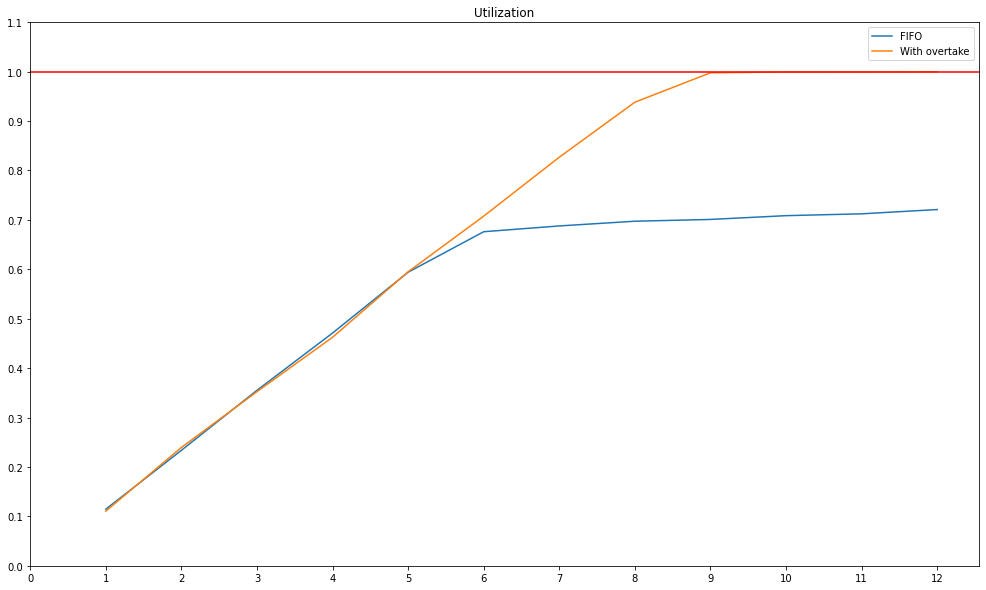

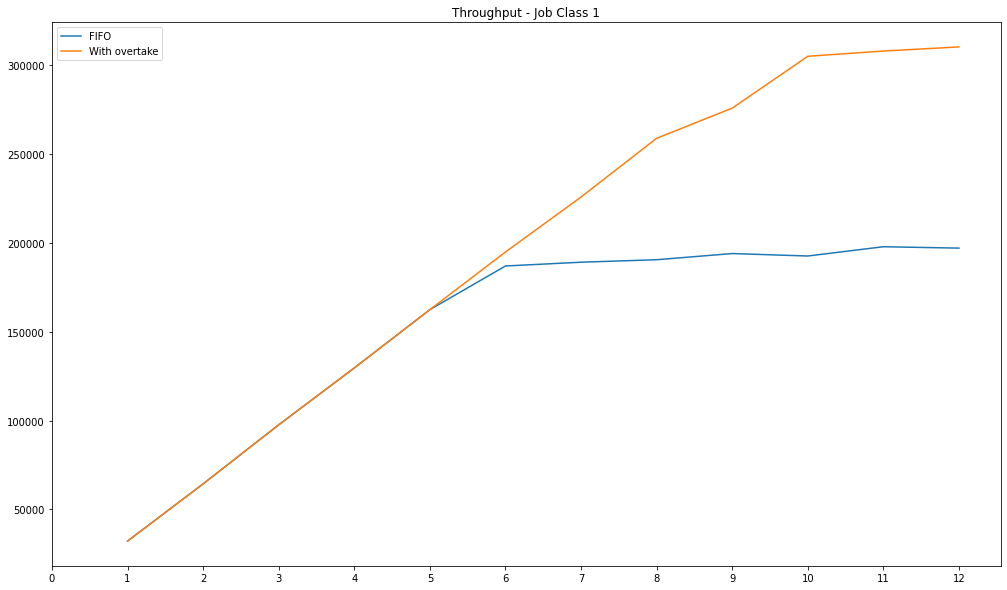

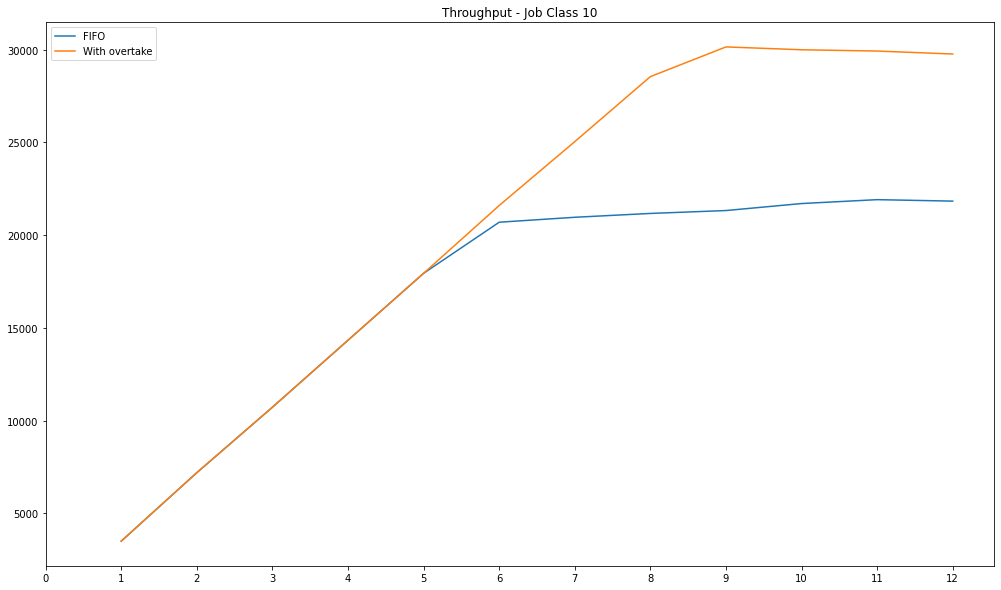

In [89]:
plt.figure(figsize=(17,10))
plt.plot([r+1 for r in range(max_lambda)], [u[0] for u in utils], label = 'FIFO')
plt.plot([r+1 for r in range(max_lambda)], [u[1] for u in utils], label = 'With overtake')
plt.axhline(y = 1, color = 'r')
plt.yticks(np.arange(0, 1.2, 0.1))
plt.xticks(np.arange(0, max_lambda+1, 1))
plt.legend()
plt.title('Utilization')
plt.show()

plt.figure(figsize=(17,10))
plt.plot([r+1 for r in range(max_lambda)], [t[0][0] for t in throughputs], label = 'FIFO')
plt.plot([r+1 for r in range(max_lambda)], [t[1][0] for t in throughputs], label = 'With overtake')
plt.xticks(np.arange(0, max_lambda+1, 1))
plt.legend()
plt.title('Throughput - Job Class 1')
plt.show()

plt.figure(figsize=(17,10))
plt.plot([r+1 for r in range(max_lambda)], [t[0][1] for t in throughputs], label = 'FIFO')
plt.plot([r+1 for r in range(max_lambda)], [t[1][1] for t in throughputs], label = 'With overtake')
plt.xticks(np.arange(0, max_lambda+1, 1))
plt.legend()
plt.title('Throughput - Job Class 10')
plt.show()

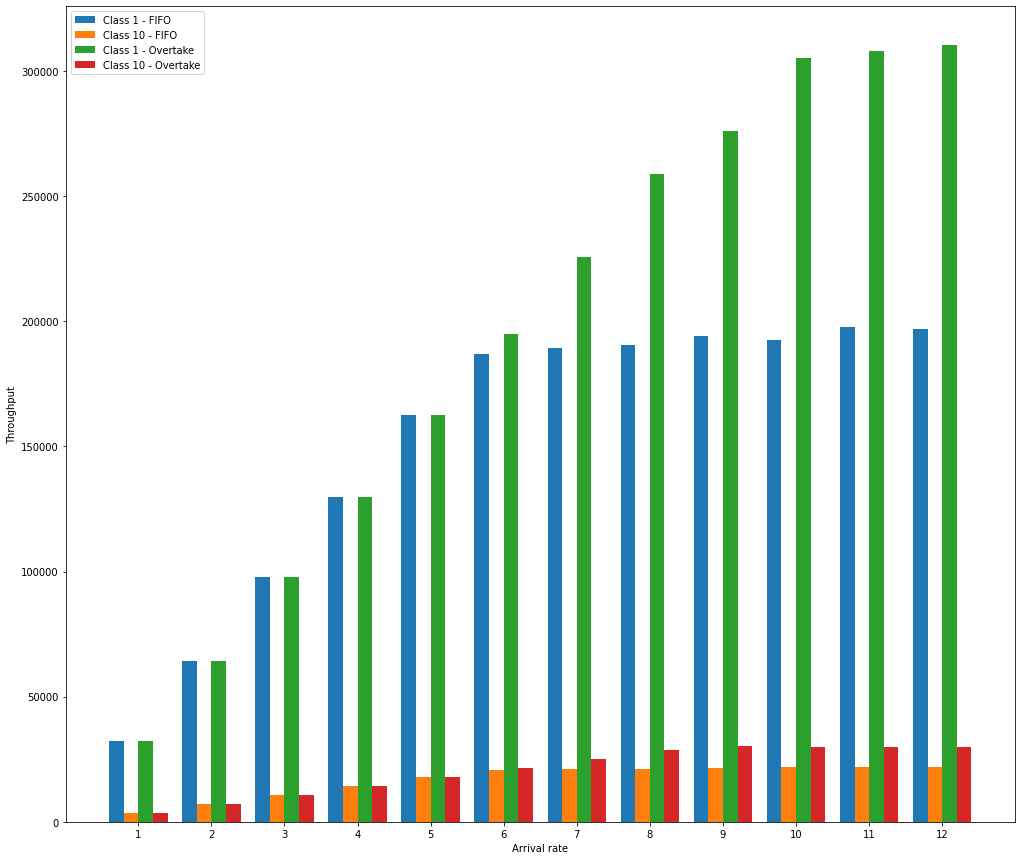

In [91]:
plt.figure(figsize=(17,15))
width = 0.2
plt.bar([n for n in range(max_lambda)], [t[0][0] for t in throughputs], width = width, label = 'Class 1 - FIFO')
plt.bar([n+width for n in range(max_lambda)], [t[0][1] for t in throughputs], width = width, label = 'Class 10 - FIFO')
plt.bar([n+(width*2) for n in range(max_lambda)], [t[1][0] for t in throughputs], width = width, label = 'Class 1 - Overtake')
plt.bar([n+(width*3) for n in range(max_lambda)], [t[1][1] for t in throughputs], width = width, label = 'Class 10 - Overtake')
plt.legend()
plt.xlabel('Arrival rate')
plt.ylabel('Throughput')
plt.xticks([n+(width*1.5) for n in range(max_lambda)],
        [n+1 for n in range(max_lambda)])
plt.show()

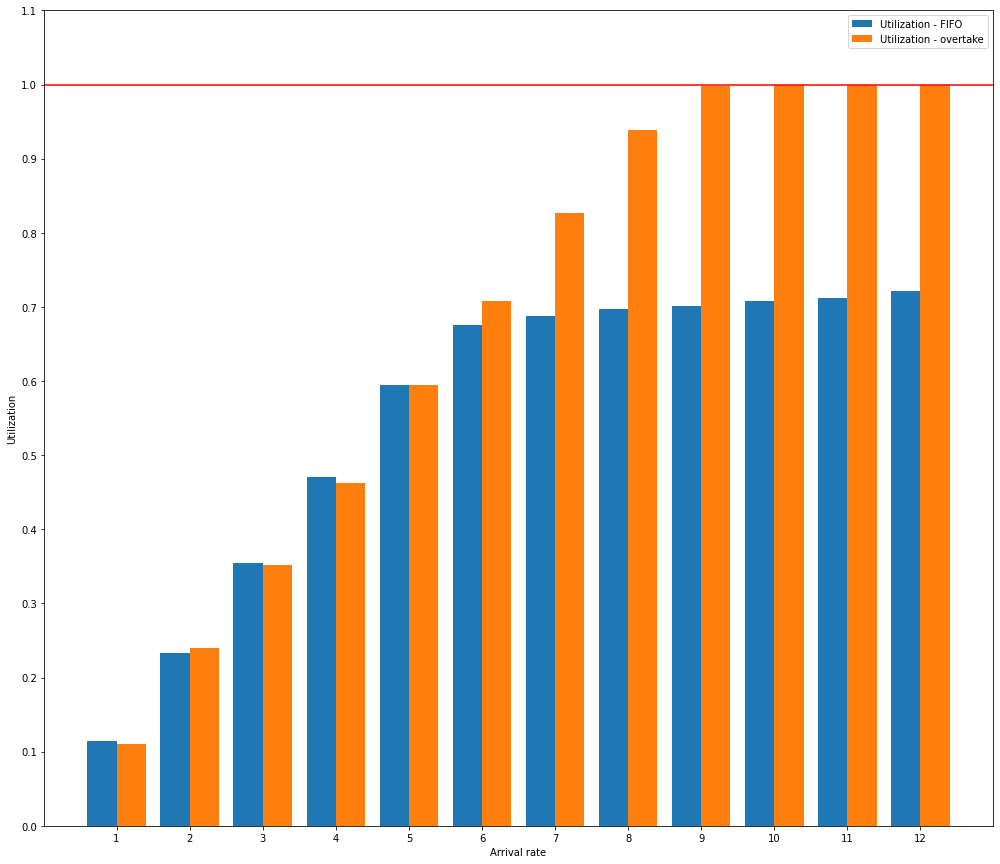

In [93]:
plt.figure(figsize=(17,15))
width = 0.4
plt.bar([n for n in range(max_lambda)], [u[0] for u in utils], width = width, label = 'Utilization - FIFO')
plt.bar([n+width for n in range(max_lambda)], [u[1] for u in utils], width = width, label = 'Utilization - overtake')
plt.legend()
plt.axhline(y = 1, color = 'r')
plt.yticks(np.arange(0, 1.2, 0.1))
plt.xlabel('Arrival rate')
plt.ylabel('Utilization')
plt.xticks([n+(width*0.5) for n in range(max_lambda)],
        [n+1 for n in range(max_lambda)])
plt.show()

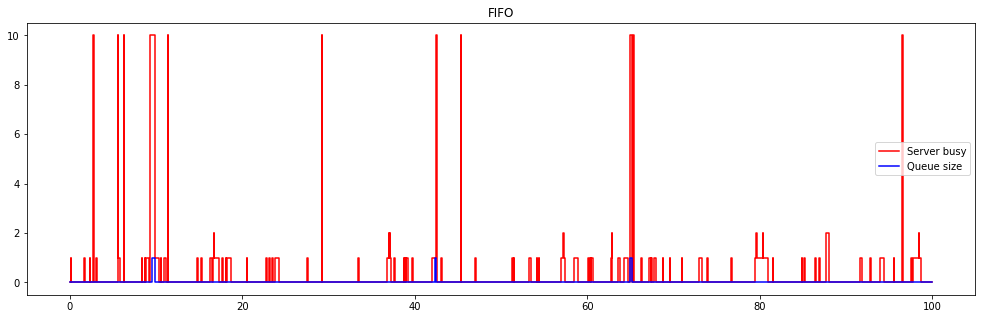

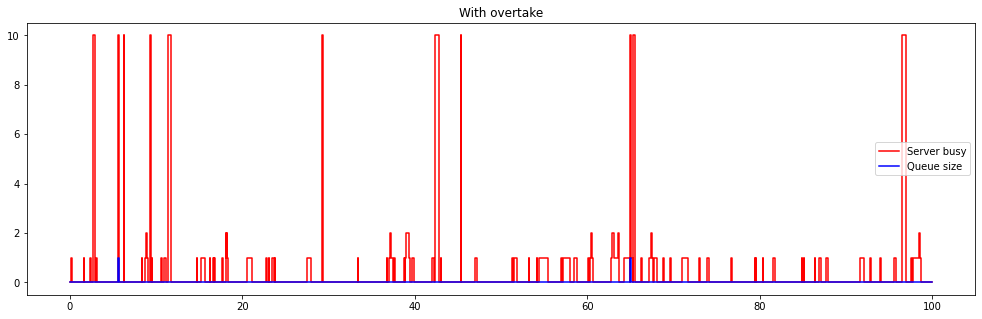

In [25]:
start_t = 0
end_t = 100

server_load = comb_sl[0]
queue_size = comb_qs[0]
tmp_server = []
tmp_queue = []
init_sl = -1
for j in server_load:
    if j[0] < start_t:
        init_sl += 1
        continue
    if j[0] > end_t:
        break
    tmp_server.append(j)
if init_sl >= 0:
    tmp_server = [[start_t,server_load[init_sl][1]]] + tmp_server
tmp_server.append([end_t,tmp_server[-1][1]])

init_qs = -1
for q in queue_size:
    if q[0] < start_t:
        init_qs += 1
        continue
    if q[0] > end_t:
        break
    tmp_queue.append(q)
if init_qs >= 0:
    tmp_queue = [[start_t,queue_size[init_qs][1]]] + tmp_queue
tmp_queue.append([end_t,tmp_queue[-1][1]])

plt.figure(figsize=(17,5))
plt.step([q[0] for q in tmp_server], [q[1] for q in tmp_server], 'r', where='post', label = 'Server busy')
plt.step([q[0] for q in tmp_queue], [q[1] for q in tmp_queue], 'b', where='post', label = 'Queue size')
plt.legend()
plt.title('FIFO')
plt.show()

server_load = comb_sl[1]
queue_size = comb_qs[1]
tmp_server = []
tmp_queue = []
init_sl = -1
for j in server_load:
    if j[0] < start_t:
        init_sl += 1
        continue
    if j[0] > end_t:
        break
    tmp_server.append(j)
if init_sl >= 0:
    tmp_server = [[start_t,server_load[init_sl][1]]] + tmp_server
tmp_server.append([end_t,tmp_server[-1][1]])

init_qs = -1
for q in queue_size:
    if q[0] < start_t:
        init_qs += 1
        continue
    if q[0] > end_t:
        break
    tmp_queue.append(q)
if init_qs >= 0:
    tmp_queue = [[start_t,queue_size[init_qs][1]]] + tmp_queue
tmp_queue.append([end_t,tmp_queue[-1][1]])

plt.figure(figsize=(17,5))
plt.step([q[0] for q in tmp_server], [q[1] for q in tmp_server], 'r', where='post', label = 'Server busy')
plt.step([q[0] for q in tmp_queue], [q[1] for q in tmp_queue], 'b', where='post', label = 'Queue size')
plt.legend()
plt.title('With overtake')
plt.show()

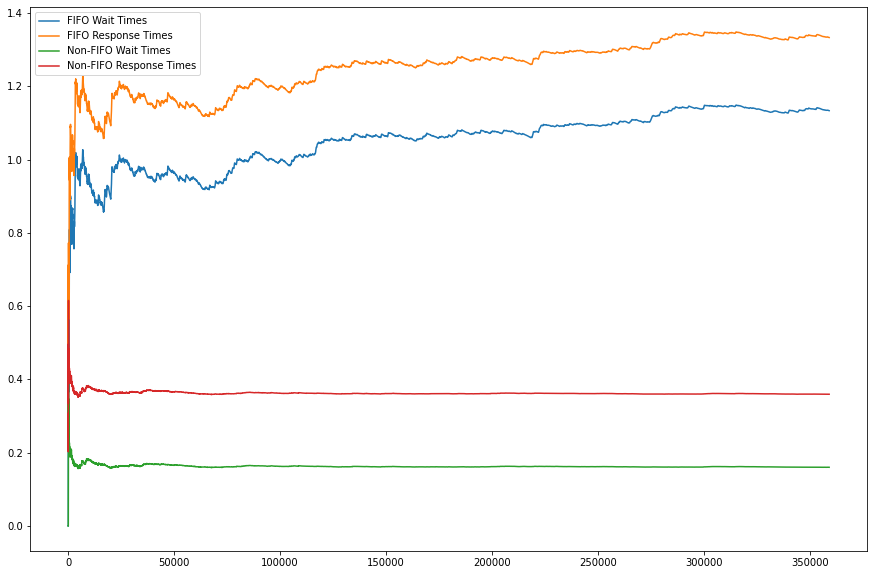

In [35]:
waiting_times = comb_wt[0]
response_times = comb_rt[0]
avg_wait = []
n = 1
tot = 0
for w in [wt[0] for wt in waiting_times]:
    tot += w
    avg_wait.append(tot/n)
    n += 1

avg_resp = []
n = 1
tot = 0
for w in [rt[0] for rt in response_times]:
    tot += w
    avg_resp.append(tot/n)
    n += 1

plt.figure(figsize=(15,10))
plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "FIFO Wait Times")
plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "FIFO Response Times")

waiting_times = comb_wt[1]
response_times = comb_rt[1]
avg_wait = []
n = 1
tot = 0
for w in [wt[0] for wt in waiting_times]:
    tot += w
    avg_wait.append(tot/n)
    n += 1

avg_resp = []
n = 1
tot = 0
for w in [rt[0] for rt in response_times]:
    tot += w
    avg_resp.append(tot/n)
    n += 1

plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "Non-FIFO Wait Times")
plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "Non-FIFO Response Times")
plt.legend()
plt.show()

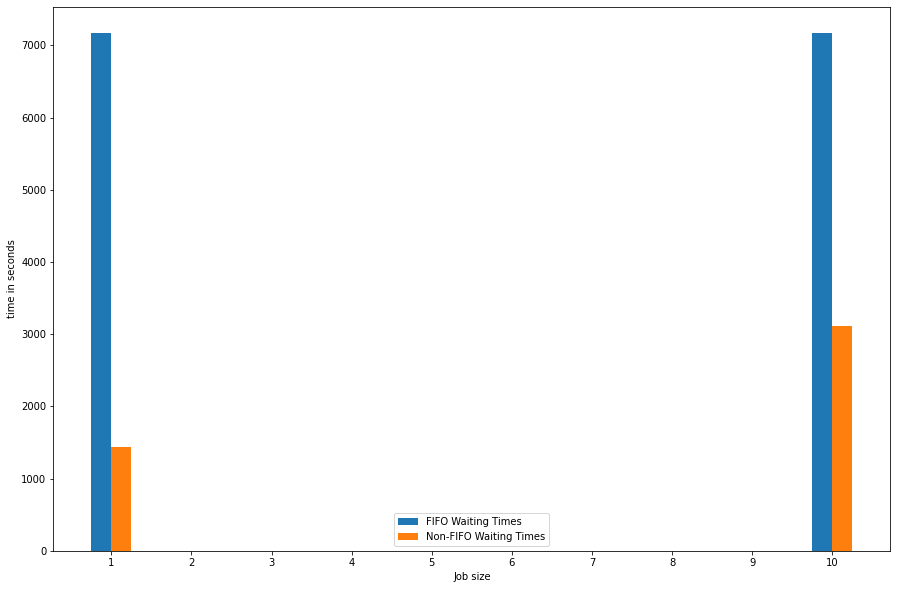

In [68]:
width = 0.25

waiting_times = comb_wt[0]
response_times = comb_rt[0]
boxed_wait = []
for i in range(job_size):
    job_size = i+1
    tmp_wait = []
    for wt in waiting_times:
        if wt[1] == job_size:
            tmp_wait.append(wt[0])
    if len(tmp_wait) == 0:
        boxed_wait.append(0)
        continue
    boxed_wait.append(mean(tmp_wait))

boxed_resp = []
for i in range(job_size):
    job_size = i+1
    tmp_resp = []
    for rt in response_times:
        if rt[1] == job_size:
            tmp_resp.append(rt[0])
    if len(tmp_resp) == 0:
        boxed_resp.append(0)
        continue
    boxed_resp.append(mean(tmp_resp))

plt.figure(figsize=(15,10))
plt.bar([n for n in range(job_size)], boxed_wait, width = width, label = 'FIFO Waiting Times')
#plt.bar([n+1 for n in range(server_n)], boxed_resp, label = 'Avg Response Times')

waiting_times = comb_wt[1]
response_times = comb_rt[1]
boxed_wait = []
for i in range(job_size):
    job_size = i+1
    tmp_wait = []
    for wt in waiting_times:
        if wt[1] == job_size:
            tmp_wait.append(wt[0])
    if len(tmp_wait) == 0:
        boxed_wait.append(0)
        continue
    boxed_wait.append(mean(tmp_wait))

boxed_resp = []
for i in range(job_size):
    job_size = i+1
    tmp_resp = []
    for rt in response_times:
        if rt[1] == job_size:
            tmp_resp.append(rt[0])
    if len(tmp_resp) == 0:
        boxed_resp.append(0)
        continue
    boxed_resp.append(mean(tmp_resp))

plt.bar([n+width for n in range(job_size)], boxed_wait, width = width, label = 'Non-FIFO Waiting Times')
plt.legend()
plt.xlabel('Job size')
plt.ylabel('time in seconds')
plt.xticks([n+(width/2) for n in range(job_size)],
        [n+1 for n in range(job_size)])
plt.show()

In [69]:
waiting_times = comb_wt[0]
response_times = comb_rt[0]
print(mean([wt[0] for wt in waiting_times]))
print(mean([rt[0] for rt in response_times]))
print('----------')

waiting_times = comb_wt[1]
response_times = comb_rt[1]
print(mean([wt[0] for wt in waiting_times]))
print(mean([rt[0] for rt in response_times]))

7170.980678209894
7171.259987800016
----------
1585.6958911395466
1585.9674208399015
